In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('gold_data.csv')

In [15]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Month,Year,Day,...,Close_lag14,Close_lag30,MA_7,MA_14,MA_30,MA_60,MA_90,STD_7,STD_14,STD_30
0,89,2001-01-09,267.500000,267.500000,267.500000,267.500000,0.0,1,2001,9,...,269.700012,266.299988,268.457140,270.700003,270.463336,268.715000,270.119999,1.604014,2.851456,2.337034
1,90,2001-01-10,264.700012,264.700012,264.700012,264.700012,0.0,1,2001,10,...,269.700012,270.100006,267.414285,270.342861,270.283336,268.520001,270.017777,1.250899,3.268905,2.563013
2,91,2001-01-11,264.000000,264.000000,264.000000,264.000000,0.0,1,2001,11,...,272.500000,269.799988,266.785714,269.735718,270.090003,268.380001,269.858888,1.698456,3.609097,2.807793
3,92,2001-01-12,263.899994,263.899994,263.899994,263.899994,0.0,1,2001,12,...,273.700012,266.399994,266.199999,269.035716,270.006670,268.253334,269.713333,1.904379,3.729431,2.954360
4,93,2001-01-16,263.299988,263.299988,263.299988,263.299988,0.0,1,2001,16,...,273.700012,270.100006,265.628571,268.292858,269.780003,268.123334,269.574444,2.108488,3.764508,3.197783


In [16]:
dates = df['Date']

In [17]:
df.drop(['Date', 'Unnamed: 0'], axis = 1, inplace = True)

In [18]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Month', 'Year', 'Day',
       'DayOfWeek', 'DayOfYear', 'Quarter', 'IsMonthStart', 'IsMonthEnd',
       'IsYearStart', 'IsYearEnd', 'Return', 'Volatility_7', 'Volatility_30',
       'Trend_7', 'Trend_30', 'Close_lag1', 'Close_lag3', 'Close_lag7',
       'Close_lag14', 'Close_lag30', 'MA_7', 'MA_14', 'MA_30', 'MA_60',
       'MA_90', 'STD_7', 'STD_14', 'STD_30'],
      dtype='object')

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# ---------------------------
# Data Preparation
# ---------------------------
df = df.copy()
prices = df['Close'].values.reshape(-1, 1)

# Scale only the Close price for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(prices)

# Function to create sequences
def create_sequences(data, window):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

window_size = 60  # use last 60 days
X, y = create_sequences(scaled_data, window_size)

# Split into train/test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for LSTM [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# ---------------------------
# LSTM Model
# ---------------------------
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# ---------------------------
# Training
# ---------------------------
history = model.fit(X_train, y_train, epochs=60, batch_size=32, validation_split=0.1, verbose=1)

# ---------------------------
# Predictions
# ---------------------------
pred_scaled = model.predict(X_test)
pred = scaler.inverse_transform(pred_scaled)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# ---------------------------
# Evaluation
# ---------------------------
mae = mean_absolute_error(actual, pred)
rmse = np.sqrt(mean_squared_error(actual, pred))
r2 = r2_score(actual, pred)

print("\n📊 LSTM Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# ---------------------------
# Visualization
# ---------------------------
plt.figure(figsize=(12, 5))
plt.plot(actual, label='Actual', color='blue')
plt.plot(pred, label='Predicted', color='orange')
plt.title('Gold Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


joblib.dump(model, "best_random_forest_gold_model.pkl")


e:\GoldLens-AI\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/60


KeyboardInterrupt: 

In [ ]:
# ---------------------------
# LSTM Model Visualization
# ---------------------------

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import plot_model

# ---------------------------
# Example LSTM Model
# ---------------------------
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

# ---------------------------
# Compile Model
# ---------------------------
model.compile(optimizer='adam', loss='mse')

# ---------------------------
# Display Model Summary
# ---------------------------
print(model.summary())

# ---------------------------
# Save Model Structure as Image
# ---------------------------
plot_model(
    model,
    to_file="lstm_model_structure.png",
    show_shapes=True,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=200
)

print("\n✅ Model structure image saved as 'lstm_model_structure.png'")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

None

✅ Model structure image saved as 'lstm_model_structure.png'


In [ ]:
# -----------------------------
# GOLD PRICE PREDICTION ENSEMBLE (LSTM + BiLSTM + GRU)
# -----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
import os

# -----------------------------
# Load & Preprocess Data
# -----------------------------
# df = pd.read_csv("gold_price.csv") 
df = df[['Close']].dropna()

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])

time_steps = 60

def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, time_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data (80-20)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# -----------------------------
# Helper Functions
# -----------------------------
def build_lstm(input_shape):
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(64),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_bilstm(input_shape):
    model = Sequential([
        Bidirectional(LSTM(128, return_sequences=True), input_shape=input_shape),
        Dropout(0.2),
        Bidirectional(LSTM(64)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_gru(input_shape):
    model = Sequential([
        GRU(128, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        GRU(64),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Create folder to save model images
os.makedirs("model_structures", exist_ok=True)

# -----------------------------
# Training Each Model
# -----------------------------
callbacks = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]

print("🚀 Training LSTM Model...")
lstm = build_lstm((X_train.shape[1], 1))
lstm.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=100, batch_size=32, verbose=1, callbacks=callbacks)

print("\n🚀 Training BiLSTM Model...")
bilstm = build_bilstm((X_train.shape[1], 1))
bilstm.fit(X_train, y_train, validation_data=(X_test, y_test),
            epochs=100, batch_size=32, verbose=1, callbacks=callbacks)

print("\n🚀 Training GRU Model...")
gru = build_gru((X_train.shape[1], 1))
gru.fit(X_train, y_train, validation_data=(X_test, y_test),
         epochs=100, batch_size=32, verbose=1, callbacks=callbacks)






🚀 Training LSTM Model...
Epoch 1/100


e:\GoldLens-AI\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


154/154 ━━━━━━━━━━━━━━━━━━━━ 15s 75ms/step - loss: 0.0015 - val_loss: 4.1046e-04
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 2.7494e-04 - val_loss: 9.2741e-04
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 2.0427e-04 - val_loss: 3.4274e-04
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - loss: 1.7993e-04 - val_loss: 4.3090e-04
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - loss: 1.3494e-04 - val_loss: 2.6117e-04
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 1.2552e-04 - val_loss: 3.6990e-04
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - loss: 1.1559e-04 - val_loss: 5.3679e-04
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - loss: 1.0928e-04 - val_loss: 3.9171e-04
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - loss: 9.5480e-05 - val_loss: 2.6730e-04
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - loss: 1.0368e-04 - val_loss: 2.5900e-04
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 21s 7

e:\GoldLens-AI\venv\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - loss: 2.4472e-04 - val_loss: 6.9110e-04
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - loss: 2.3651e-04 - val_loss: 9.5372e-04
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 1.6187e-04 - val_loss: 1.5948e-04
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - loss: 1.4601e-04 - val_loss: 1.1951e-04
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - loss: 1.2932e-04 - val_loss: 1.6838e-04
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 1.2400e-04 - val_loss: 1.6347e-04
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - loss: 1.0039e-04 - val_loss: 1.5997e-04
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - loss: 1.0132e-04 - val_loss: 1.4502e-04
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 9.3337e-05 - val_loss: 1.9594e-04
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━

ValueError: Cannot embed the 'svg' image format

In [24]:
MODEL_STRUCT_DIR = "model_structures"
os.makedirs(MODEL_STRUCT_DIR, exist_ok=True)

def save_model_plot(model, name):
    """Save both .png and .svg plots with all details."""
    png_path = f"{MODEL_STRUCT_DIR}/{name}_model_structure.png"
    # svg_path = f"{MODEL_STRUCT_DIR}/{name}_model_structure.svg"
    plot_model(model, to_file=png_path, show_shapes=True, show_layer_names=True, expand_nested=True, dpi=100)
    # plot_model(model, to_file=svg_path, show_shapes=True, show_layer_names=True, expand_nested=True, dpi=100)
    print(f"Saved model architecture for {name} in PNG and SVG formats: {png_path}")

# Usage:
save_model_plot(lstm, "LSTM")
save_model_plot(bilstm, "BiLSTM")
save_model_plot(gru, "GRU")

print("\n✅ Model architecture images saved in 'model_structures/' folder")

Saved model architecture for LSTM in PNG and SVG formats: model_structures/LSTM_model_structure.png
Saved model architecture for BiLSTM in PNG and SVG formats: model_structures/BiLSTM_model_structure.png
Saved model architecture for GRU in PNG and SVG formats: model_structures/GRU_model_structure.png

✅ Model architecture images saved in 'model_structures/' folder


In [9]:
# -----------------------------
# Predictions
# -----------------------------
pred_lstm = lstm.predict(X_test)
pred_bilstm = bilstm.predict(X_test)
pred_gru = gru.predict(X_test)

# Ensemble average
ensemble_pred = (0.2*pred_lstm + 0.4*pred_bilstm + 0.3*pred_gru)

# Inverse scaling
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
pred_lstm_actual = scaler.inverse_transform(pred_lstm)
pred_bilstm_actual = scaler.inverse_transform(pred_bilstm)
pred_gru_actual = scaler.inverse_transform(pred_gru)
ensemble_actual = scaler.inverse_transform(ensemble_pred)



39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step


In [12]:
y_test_actual[:10], ensemble_actual[:10], (y_test_actual[:10]-ensemble_actual[:10])

(array([[1804.80004883],
        [1805.69995117],
        [1781.90002441],
        [1775.69995117],
        [1814.09997559],
        [1825.69995117],
        [1836.80004883],
        [1835.90002441],
        [1861.80004883],
        [1870.80004883]]),
 array([[1683.9753],
        [1675.0647],
        [1666.3414],
        [1656.0374],
        [1645.911 ],
        [1641.1573],
        [1639.4904],
        [1640.2086],
        [1641.4935],
        [1645.7454]], dtype=float32),
 array([[120.82470703],
        [130.63525391],
        [115.55859375],
        [119.66259766],
        [168.18896484],
        [184.54260254],
        [197.30969238],
        [195.69140625],
        [220.30651855],
        [225.0546875 ]]))


📊 LSTM Performance:
MAE: 43.70
RMSE: 61.24
R²: 0.9877

📊 BiLSTM Performance:
MAE: 27.45
RMSE: 37.64
R²: 0.9954

📊 GRU Performance:
MAE: 108.25
RMSE: 124.50
R²: 0.9492

📊 Ensemble Performance:
MAE: 229.42
RMSE: 243.46
R²: 0.8059


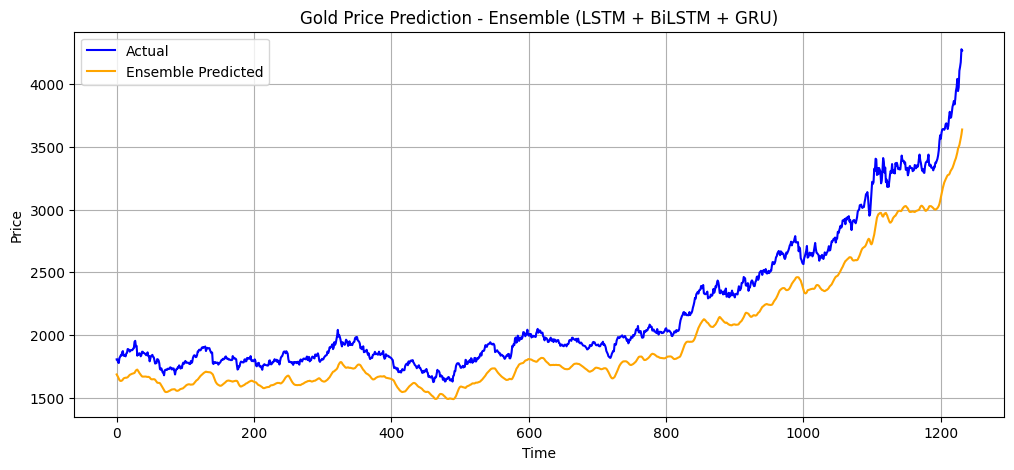

In [36]:
# -----------------------------
# Evaluation Function
# -----------------------------
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")
    return mae, rmse, r2

# Evaluate all models
results = {}
results['LSTM'] = evaluate_model('LSTM', y_test_actual, pred_lstm_actual)
results['BiLSTM'] = evaluate_model('BiLSTM', y_test_actual, pred_bilstm_actual)
results['GRU'] = evaluate_model('GRU', y_test_actual, pred_gru_actual)
results['Ensemble'] = evaluate_model('Ensemble', y_test_actual, ensemble_actual)

# -----------------------------
# Visualization
# -----------------------------
plt.figure(figsize=(12,5))
plt.plot(y_test_actual, color='blue', label='Actual')
plt.plot(ensemble_actual, color='orange', label='Ensemble Predicted')
plt.title('Gold Price Prediction - Ensemble (LSTM + BiLSTM + GRU)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
